# Import Check

In [3]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline

In [5]:
# export 
from exp.nb_00 import Test

import operator

def test(a,b,cmp, cname=None):
    if cname is None : 
        cname=cmp.__name__
    assert cmp(a,b), f"{cname}:\n{a}\n{b}"

def test_eq(a,b):
    test(a,b,operator.eq, "==")

In [6]:
test_eq(Test, "test")

In [7]:
# To run the test in console
#!python run_notebook.py 01_matmul.ipynb

.

# Matrix Multiplication From Foundations

In [10]:
#export
from pathlib import Path 
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle , gzip, math,torch , matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL = 'http://deeplearning.net/data/mnist/mnist.pkl'

In [11]:
path = datasets.download_data(MNIST_URL,ext=".gz")
path

PosixPath('/home/blue/.fastai/data/mnist.pkl.gz')

In [12]:
with gzip.open(path,"rb") as f:
   ((x_train,y_train),(x_valid, y_valid),_) = pickle.load(f, encoding='latin-1')

In [17]:
x_train,y_train , x_valid, y_valid = map(tensor , (x_train,y_train , x_valid, y_valid))
n,c = x_train.shape
x_train,x_train.shape , y_valid,y_train.shape, y_train.min(), y_train.max()

/home/blue/miniconda3/envs/gpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor([3, 8, 6,  ..., 5, 6, 8]),
 torch.Size([50000]),
 tensor(0),
 tensor(9))

In [20]:
assert n == y_train.shape[0]==50000
test_eq(c,28*28)
test_eq(y_train.min(),0)
test_eq(y_train.max(),9)

In [21]:
mpl.rcParams["image.cmap"]="gray"

In [22]:
img = x_train[0]

In [25]:
img.view(28,28).type() # reshaping the data

'torch.FloatTensor'

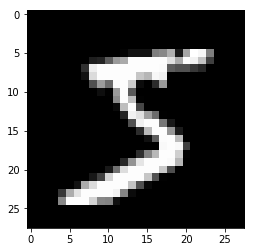

In [24]:
plt.imshow(img.view(28,28))

In [26]:
weights = torch.randn(784,10)
bias = torch.zeros(10)

#### Matrix maltiplication

    -http://matrixmultiplication.xyz/ 

In [31]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac == br
    c = torch.zeros(ar,bc)
    for i in range(ar): 
        for j in range(bc):
            for k in range(ac): # a matrix row time b's col
                c[i,j] += a[i,k] * b[k,j]
    return c

    

In [105]:
m1 = x_valid[:5]
m2 = weights

In [106]:

m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [47]:
 %timeit -n 10 _ = matmul(m1,m2)

782 µs ± 66.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [39]:
t1.shape

torch.Size([5, 10])

In [ ]:
# kind slow 

In [40]:
len(x_train)

50000

# Use of the torch 

In [43]:
m = tensor([[1.,2,3],[4,5,6],[7,8,9]]);m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

#### Frobenius norm


$\|A\|_{\rm F} = \sqrt{\sum_{i=1}^m \sum_{j=1}^n |a_{ij}|^2}=\sqrt{\operatorname{trace}\left(A^\textsf{T}A\right)} = \sqrt{\sum_{i=1}^{\min\{m, n\}} \sigma_i^2(A)},$


In [44]:
(m*m).sum().sqrt() 

tensor(16.8819)

In [48]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac == br
    c = torch.zeros(ar,bc)
    for i in range(ar): 
        for j in range(bc):
                c[i,j] = (a[i,:] * b[:,j]).sum()
    return c


In [49]:
 %timeit -n 10 _ = matmul(m1,m2)

793 µs ± 64 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [50]:
#export
def near(a,b):
    return torch.allclose(a,b, rtol=1e-3, atol=1e-5)

def test_near(a,b): test(a,b,near)

In [51]:
test_near(t1, matmul(m1,m2)) #hence they are near 

# Broadcasting 

How lib treats arrays ieht different shapes during arithmetic operations ?

In [55]:
a =  tensor([10,6,5])
a

tensor([10,  6,  5])

In [58]:
a > 1

tensor([1, 1, 1], dtype=torch.uint8)

In [63]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [67]:
c = tensor([10.,20,30]);c

tensor([10., 20., 30.])

In [68]:
m.shape , c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [70]:
m + c # boardcasting row over the matrix

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [71]:
 c+ m 

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [72]:
 t = c.expand_as(m)

In [75]:
t  # its acting like its creating this 't' tensor

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [76]:
m + t 

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [77]:
t.storage()

 10.0
 20.0
 30.0
[torch.FloatStorage of size 3]

In [80]:
t.stride(), t.shape # stride holds the idea to copy 0 mean dont repat row , 1 says repeat col for reach col

((0, 1), torch.Size([3, 3]))

In [81]:
c.unsqueeze(0)

tensor([[10., 20., 30.]])

In [82]:
c.unsqueeze(1)

tensor([[10.],
        [20.],
        [30.]])

In [83]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [86]:
c.shape, c.unsqueeze(0).shape, c.unsqueeze(1).shape #  squeez a dim here pls

(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]))

In [88]:
c.shape, c[None , :].shape, c[:,None].shape #  squeez a dim here pls

(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]))

In [89]:
c.expand_as(m)

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [94]:
c[:,None].expand_as(m)

tensor([[10., 10., 10.],
        [20., 20., 20.],
        [30., 30., 30.]])

In [95]:
m[1]

tensor([4., 5., 6.])

In [91]:
m + c[:,None]

tensor([[11., 12., 13.],
        [24., 25., 26.],
        [37., 38., 39.]])

In [104]:
m1

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [124]:
 m1[1].unsqueeze(-1) *   m2 

tensor([[-0., -0., 0.,  ..., 0., 0., -0.],
        [0., 0., -0.,  ..., 0., 0., 0.],
        [0., -0., 0.,  ..., -0., -0., 0.],
        ...,
        [-0., -0., -0.,  ..., 0., 0., 0.],
        [-0., 0., -0.,  ..., 0., -0., 0.],
        [-0., -0., 0.,  ..., -0., -0., 0.]])

In [128]:
def matmul(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
#       c[i,j] = (a[i,:]          * b[:,j]).sum() # previous
        c[i]   = (a[i].unsqueeze(-1) * b).sum(dim=0)
    return c

In [129]:
 %timeit -n 10 _ = matmul(m1,m2)

175 µs ± 10.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Einstein Summation

In [130]:
#c[i,j] += a[i,k] * b[k,j]
# i k * k j ->   i j  
#c[i,j] = (a[i,:] * b[:,j]).sum()
def matmul(a,b):
    return torch.einsum('ik,kj->ij',a,b)

In [134]:
 %timeit -n 10 _ = matmul(m1,m2)

34.2 µs ± 5.11 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Fastest 

In [135]:
test_near(t1, matmul(m1,m2))

In [137]:
%timeit -n 10 t2 = m1.matmul(m2)

5.9 µs ± 2.9 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [138]:
t2 = m1@m2

In [140]:
test_near(t1,t2)